# Project 2: Modelling Road Deformation using Non-Linear Least-Squares

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px; height: auto; margin: 0"\>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px; height: auto; margin: 0"\>
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Weeks 3 & 4, Friday Sep 22 & Friday Sep 29, 2023.*

## Background

There are numerous subsurface processes that give rise to observable subsidence at the surface. These processes can be categorized into two main categories: 'deep' subsidence and 'shallow' subsidence. 'Deep' subsidence stems from processes occurring in the deeper subsurface layers (e.g., deeper than 0.5 kilometers below the surface). For instance, extracting gas from a reservoir leads to compaction of the deeper layers, which then results in subsidence of the Earth's surface. On the other hand, 'shallow' subsidence arises from activities within the upper layers of the subsurface. When the groundwater table drops, it triggers shrinkage and oxidation of organic material above the ground water level. Additionally, processes like consolidation and creep contribute to shallow subsidence. Conversely, when the groundwater level rises, a portion of the subsidence becomes reversible, as the layers swell due to the increased water content.

In the Green Heart region in the Netherlands a lot of 'shallow' subsidence occurs. In the typical polder landscape the groundwater table is kept blow a certain level, causing peat layers to oxidize and shrink resulting in subsidence. Also, since the ground water level is highly variable over the year (due to changes in temperature and precipitation), this results in highly variable ground movements which can be quite significant. 

In the context of our assignment, we investigate the observed deformation of a recently constructed road in the <a href="https://www.groenehart.nl/the-green-heart-of-holland" target="_blank"> Green Heart</a> Region. It's reasonable to anticipate that when a heavy structure is built on top of a 'soft' soil layer, additional subsidence may occur due to compaction in the upper surface layers. Over time, as the sediment settles, this extra compaction will diminish. However, it is still expected to observe some up and down movement related due to changing ground water levels. 

### Data

The input data for this assignment are two different deformation time series for a (hypothetical) road in the Green heart in the Netherlands. We assume that the road was built in 2016. We will have a look at <a href="https://en.wikipedia.org/wiki/Interferometric_synthetic-aperture_radar" target="_blank"> InSAR</a> data and <a href="https://en.wikipedia.org/wiki/Satellite_navigation" target="_blank"> GNSS</a> (Global Navigation Satellite Systems) data.

With InSAR we can retrieve displacements from time series of radar images. In this exercise we will consider displacement time series from Sentinel-1 from 2017 till 2019. More information on the Sentinel-1 mission can be found <a href="https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-1" target="_blank">here</a>.

We will also have a look at GNSS data. In the project repository on GitLab, you will find three data files for this assignment: `gnss_observations.csv`, `insar_observations.csv` and `groundwter_levels.csv`. All files consist of two columns, one for the dates and one for the observations. In the GNSS and InSAR files the observations are observed vertical displacements (units of m).

<div class="alert alert-block alert-warning" style="vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">Note that ground water levels are in units of mm.</div>

In [1]:
import numpy as np
import scipy as sc
from scipy import interpolate

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from scipy.stats.distributions import chi2
from scipy.stats import norm

from typing import Union

np.set_printoptions(precision=3)

## Task 1: Preparing the data

Within this assignment you will work with two types of data: InSAR data and GNSS data. The cell below will load the data and visualize the observed displacements time. In this task we use the package `pandas`, which is really useful for handling time series. We will learn how to use it later in the quarter; for now, you only need to recognize that it imports the data as a `dataframe` object, which we then convert into a numpy array using the code below.

In [2]:
gnss = pd.read_csv('./data/gnss_observations2.csv')
dates_gnss = pd.to_datetime(gnss['dates'])
gnss_obs = (gnss['observations[m]']).to_numpy()*1000

insar = pd.read_csv('./data/insar_observations2.csv')
dates_insar = pd.to_datetime(insar['dates'])
insar_obs = (insar['observations[m]']).to_numpy()*1000

gw = pd.read_csv('./data/groundwater_levels2.csv')
dates_gw = pd.to_datetime(gw['dates'])
gw_obs = (gw['observations[mm]']).to_numpy()


#test


<div class="alert alert-block alert-warning" style="vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">Note that we convert all observations to millimeters here.</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
    
Once you have used the cell above to import the data, investigate the data sets using the code cell below. Then provide some relevant summary information in the Markdown cell. Hint: use some of the techniques we covered in the Programming Assignments.
    
</p>
</div>

In [3]:
print(f'Relevant information:')
print(f'The size of the gnss array is: {np.shape(dates_gnss)}')


print(f'The size of the insar array is: {np.shape(dates_insar)}')

print(f'The size of the groundwater array is: { np.shape(dates_gw)}')

print(f'The mean and variance of the gnss data is: {np.mean(gnss_obs)} mm, {np.var(gnss_obs)} mm')
print(f'The mean and variance of the insar data is: {np.mean(insar_obs)} mm, {np.var(insar_obs)} mm')

boolean = np.isnan(gnss_obs, out=None, where=True)

print(f"There are {boolean.sum()} NaNs in array gnss_obs")

boolean2 = np.isnan(insar_obs, out=None, where=True)

print(f"There are {boolean2.sum()} NaNs in array insar_obs")

print(f'The maximum observation of insar is: {insar_obs.max()} mm')
print(f'The minimum observation of insar is: {insar_obs.min()} mm')

print(f'The maximum observation of gnss is: {gnss_obs.max()} mm')
print(f'The minimum observation of gnss is: {gnss_obs.min()} mm')

Relevant information:
The size of the gnss array is: (730,)
The size of the insar array is: (61,)
The size of the groundwater array is: (25,)
The mean and variance of the gnss data is: -24.37308485240635 mm, 307.2448686580894 mm
The mean and variance of the insar data is: -20.98275207389987 mm, 52.805639387160646 mm
There are 0 NaNs in array gnss_obs
There are 0 NaNs in array insar_obs
The maximum observation of insar is: 1.693373008259 mm
The minimum observation of insar is: -31.657118406310303 mm
The maximum observation of gnss is: 34.6147554850616 mm
The minimum observation of gnss is: -88.69691758641291 mm


**Write your answer in this Markdown cell.**

From this information we can retrieve that the gnss and insar take measurements at different time intervals, as seen by the different data set size. The size of 730 of the gnss array gives us the information that the time interval of measurements is every day. Whereas the size of the insar array is 61, meaning a time interval of ervery 12 days. For the groundwater array this is 25, thus a time interval of every month. The gnss and insar observarions are based on two different methods but both measure the same variable (the displacement). Based on the variance of the gnss data, this higher value could indicate that this technique is less precise than insar. This difference can also be seen at the maximum and minimum values. Finally we can conclude that there are no 'nan' values in the arrays.

You may have noticed that the groundwater data is available for different dates/times than the GNSS and InSAR data. You will therefore have to *interpolate* the data to the same dates/times for a further analysis. You can use the SciPy function ```interpolate.interp1d``` (read its [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)).

The cells below do the following:
1. Define a function to convert the time unit
2. Convert the time stamps for all data
3. Use `interp1d` to interpolate the groundwater measurements at the time of the satellite measurements

In [4]:
def to_days_years(dates):
    '''Convert the observation dates to days and years.'''
    
    dates_datetime = pd.to_datetime(dates)
    time_diff = (dates_datetime - dates_datetime[0])
    days_diff = (time_diff / np.timedelta64(1,'D')).astype(int)
    
    days = days_diff.to_numpy()
    years = days/365
    
    return days, years

In [5]:
days_gnss,  years_gnss  = to_days_years(dates_gnss)
days_insar, years_insar = to_days_years(dates_insar)
days_gw,    years_gw    = to_days_years(dates_gw)

interp = interpolate.interp1d(days_gw, gw_obs)

GW_at_GNSS_times = interp(days_gnss)
GW_at_InSAR_times = interp(days_insar)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   
    
Answer/complete the following in the code and Markdown cells below:
<ol>
    <li>What is <code>interp</code>? (what kind of object is it, and how does it work?)</li>
    <li>How did the groundwater observation array change? Be quantitative. </li>
</ol>
    
</p>
</div>

In [6]:
print(type(interp))

print(len(days_gw))
print(len(GW_at_GNSS_times))
print(len(GW_at_InSAR_times))

<class 'scipy.interpolate._interpolate.interp1d'>
25
730
61


**Write your answer in this Markdown cell.**

interp is a 1-d linear interpolation class initialised from interpolate.interp1d() using the observations and observations dates of the groundwater measurements. When plugging in the dates of the gnss or insar observations into interp() this gets interpolated. 

The array got much bigger, from monthly observations (2 years $\approx$ 25 months), to either biweekly observations (25 months * 2 roughly), and to daily amount (2 years * 365 = 730 roughly)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b>   
    
Create a plot to compare observed displacement for the GNSS and InSAR data sets.
    
</p>
</div>

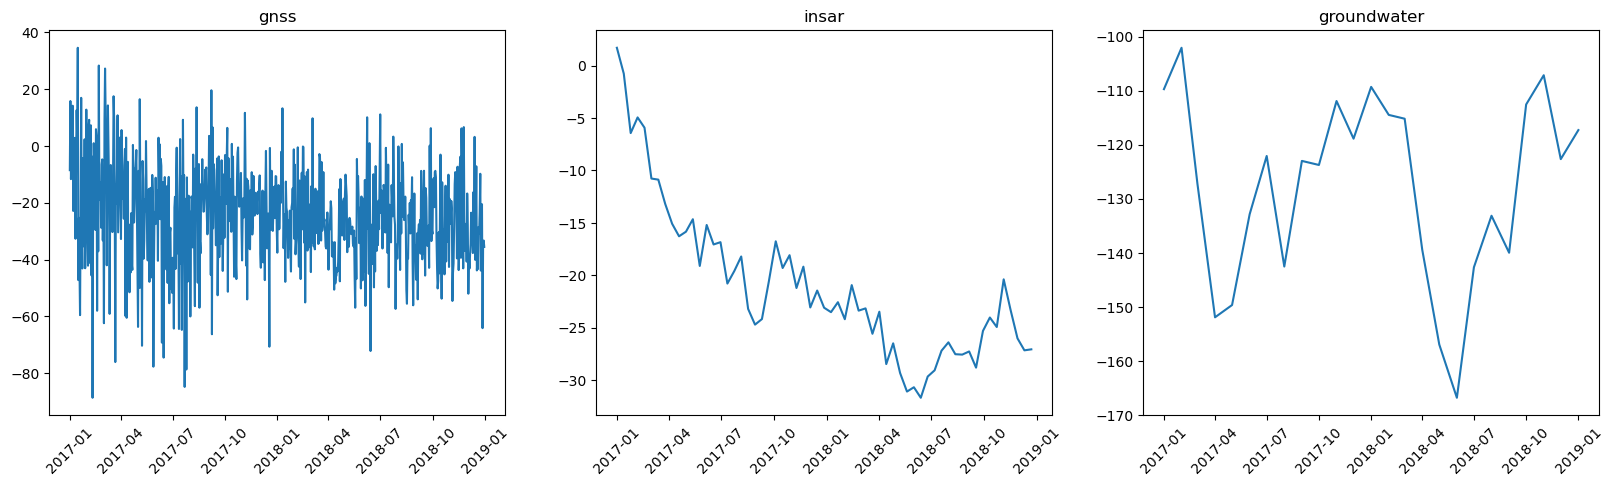

<Figure size 640x480 with 0 Axes>

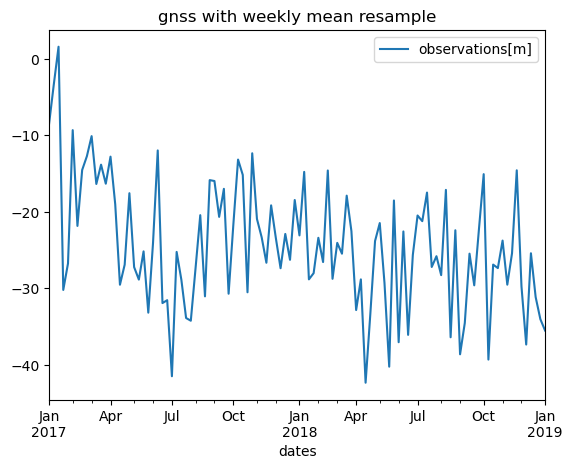

In [7]:
gnss = pd.read_csv('./data/gnss_observations2.csv', index_col=1, parse_dates=True)
gnss = gnss.resample('W').mean()
gnss = gnss.drop("Unnamed: 0", axis=1)
gnss["observations[m]"] = gnss["observations[m]"] * 1000

plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1)
ax1.plot(dates_gnss, gnss_obs)
ax1.set_title('gnss')
plt.xticks(rotation=45)



ax2 = plt.subplot(1, 3, 2)
ax2.plot(dates_insar, insar_obs)
ax2.set_title('insar')
plt.xticks(rotation=45)


ax3 = plt.subplot(1, 3, 3)
ax3.plot(dates_gw, gw_obs)
ax3.set_title('groundwater')
plt.xticks(rotation=45)

plt.figure()
gnss.plot()
plt.title('gnss with weekly mean resample');


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.4:</b>   
What is your interpretation of the data? What kind of deformation do you see? And what are the differences between both datasets? Be quantitative.
</p>
</div>

**Write your answer in this Markdown cell.**

The insar shows smaller deviation in its measurements than the gnss data. This could be attributed to the way of measuring, where insar uses radar which is more accurate than the use of satallites in gnss. Because of this lower accuracy the gnss shows high variability in terms of measurments. Also a thing to note is the difference in amount of measurements, the gnss makes a measurement everyday whereas the insar only does so every 2 weeks.

Another thing to note, is the dip in groundwater level around 2018-04 and 2017-07, there is clear correlation in measured subsidence in the insar measurments. 

Because of the larger inaccuracy of gnss it shows a very high subsidence of up to 80 mm, whereas the insar only has a maximum subsidence of 30 mm. 

## Task 2: Set-up linear functional model

We want to investigate how we could model the observed displacements of the road. Because the road is built in the Green Heart we expect that the observed displacements are related to the groundwater level. Furthermore, we assume that the displacements can be modelded using a constant velocity. The model is defined as 
$$
d = d_0 + vt + k \ \textrm{GW},
$$
where $d$ is the displacement, $t$ is time and $\textrm{GW}$ is the groundwater level (which we assume to be deterministic). 

The model has 3 unknowns:
1. $d_0$, the initial displacement at $t_0$
2. $v$ the displacement velocity
3. and $k$, the 'groundwater factor' which can be seen as the response of the soil to changes in the groundwater level


As a group you will construct the functional model that is defined as 
$$
\mathbb{E}(Y) = \mathrm{A x}.
$$



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   
    
Construct the design matrix A and the observation vector $Y$ (for both the InSAR and GNSS observations) and show the first 5 rows of them.
</p>
</div>

In [8]:
# Contruct A and Y for InSAR: A_insar, y_insar

A_insar = np.column_stack([np.ones(len(days_insar)), days_insar, GW_at_InSAR_times])

y_insar = insar_obs
m_insar = len(y_insar)

In [9]:
# Contruct A and Y for GNSS: A_gnss, y_gnss

A_gnss = np.column_stack([np.ones(len(days_gnss)), days_gnss, GW_at_GNSS_times])

y_gnss = gnss_obs
m_gnss = len(y_gnss)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.2:</b>   
Answer the following questions:
    
1. What is the dimension of the vector with the observables $Y$?
    
2. What are the unknowns of the functional model?
    
3. What is the redundancy for this model? 
</p>
</div>


In [10]:
print(np.shape(y_gnss))
print(np.shape(y_insar))



(730,)
(61,)


**Write your answer in this Markdown cell.**

The Y vector for gnss is of shape 730, and the Y vector for insar is 61,.

The model has 3 unknowns:
1. $d_0$, the initial displacement at $t_0$
2. $v$ the displacement velocity
3. and $k$, the 'groundwater factor' which can be seen as the response of the soil to changes in the groundwater level

And the redundancy is dependent on the amount of unknowns and observations.

Redundancy = #observations - #unknowns

So, for the gnss model the redundancy 727 and for the insar model it is 58.

## 3. Set-up stochastic model

We will use the Best Linear Unbiased Estimator (BLUE) to solve for the unknown parameters. Therefore we also need a stochastic model, which is defined as
$$
\mathbb{D}(Y) = \Sigma_{Y}.
$$
where $\Sigma_{Y}$ is the covariance matrix of the observable vector. 




<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   
    
Construct the covariance matrix and assume that 
    
- $\sigma_\textrm{InSAR} = 2$ mm and $\sigma_\textrm{GNSS} = 5$ mm 
    
- the observables are normally distributed
    
- and that the observables are independent. 
</p>
</div>


In [11]:
# Stochastic model for InSAR: Sigma_y_insar
sigma_insar = [2**2]

Sigma_y_insar = np.diagflat([sigma_insar * len(insar_obs)])



In [12]:
# Stochastic model for GNSS: Sigma_y_gnss
sigma_gnss = [15**2]

Sigma_y_gnss = np.diagflat([sigma_gnss * len(gnss_obs)])

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>   
Answer the following questions:
    
- What information is contained in the covariance matrix? 
    
- How do you implement the assumption that all observations are independent?
    
- What is the dimension of $\Sigma_{Y}$?
    
- How do you create $\Sigma_{Y}$?
</p>
</div>



In the covariance matrix the information about the variance of each individual observation is contained, it is also possible to make observations dependent on each other by putting values of the main diagonal. Thus to make all observations independent, it is key to only put in a variance value on the main diagonal. 

The dimension of Sigma_y is dependent on the amount of observations and it will be a square matrix. If the length of a set of observations is m, the covariance matrix will be of dimension m x m.

Sigma_Y is created by squaring the given variances and inserting them on a main diagonal that is of the same length as the observations. 

## 4. Apply best linear unbiased estimation



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.1:</b>   
    
Write a function to apply BLUE in the cell below and use the function to estimate the unknowns for the model using the data. Print the values for the estimated parameters
</p>
</div>



In [13]:
def BLUE(A: np.ndarray, y: np.ndarray, Sigma_y: np.ndarray) -> Union[np.ndarray, np.ndarray]:
    """Performs the BLUE method by taking the inverse of the covariance matrix, and determining an estimated x value and the variance of x. 

    Args:
        A (np.ndarray): Design matrix
        y (np.ndarray): Observation vector
        Sigma_y (np.ndarray): Covariance matrix

    Returns:
        Union[np.ndarray, np.ndarray]: Estimates, propagated covariance
    """
    inv_Sigma_y = np.linalg.inv(Sigma_y)
    
    x_hat = np.linalg.inv(A.T @ inv_Sigma_y @ A) @ A.T @ inv_Sigma_y @ y
    
    Sigma_x_hat = np.linalg.inv(A.T @ np.linalg.inv(Sigma_y) @ A)
    
    return x_hat, Sigma_x_hat  

In [14]:
# Estimate the unknown parameters with InSAR: x_hat_insar, Sigma_x_hat_insar
x_hat_insar, Sigma_x_hat_insar = BLUE(A_insar, y_insar, Sigma_y_insar)

# Estimate the unknown parameters with GNSS: x_hat_gnss, Sigma_``x_hat_gnss
x_hat_gnss, Sigma_x_hat_gnss = BLUE(A_gnss, y_gnss, Sigma_y_gnss)

print('Initial, speed, k-factor')
print(x_hat_insar)

print(x_hat_gnss)

Initial, speed, k-factor
[ 9.043 -0.028  0.156]
[-4.268 -0.014  0.116]


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.2:</b>   
Do the values that you just estimated make sense? Explain, using quantitative results.
</p>
</div>



The difference in the initial position make sense, this comes from the fact that the data, both recorded at the same day have about a 10mm difference. The difference in speed can be partly attributed to the fact that the insar speed has to compensate for the higher initial value. 



## 5. Evaluate the precision



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>   
    
What is the precision of the final estimates? Print the full covariance matrix of your estimates, and give an interpretation of the numbers in the covariance matrix.
</p>
</div>



In [15]:
print('initial,       speed,     k-fac')
print(Sigma_x_hat_gnss)
print(np.mean(Sigma_x_hat_gnss))

print('initial,       speed,     k-fac')
print(Sigma_x_hat_insar)
print(np.mean(Sigma_x_hat_insar))

initial,       speed,     k-fac
[[ 2.160e+01 -2.244e-03  1.595e-01]
 [-2.244e-03  6.945e-06  2.238e-06]
 [ 1.595e-01  2.238e-06  1.249e-03]]
2.434806094773141
initial,       speed,     k-fac
[[ 4.530e+00 -4.173e-04  3.363e-02]
 [-4.173e-04  1.472e-06  8.776e-07]
 [ 3.363e-02  8.776e-07  2.646e-04]]
0.5107605964149561


**Write your answer in this Markdown cell.**

The variance of the gnss is overall lower than of the insar (0.27 vs 0.51). The estimate has a lower variance due to the fact that it has 10x the amount of observations. This stems from the fact that the higher the redundancy the higher the precision of the estimation. 

## 6. Present and reflect on estimation results



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6.1:</b>   
    
Compute the modeled displacements ($\hat{\mathrm{y}}$), and corresponsing residuals ($\hat{\mathrm{\epsilon}}$). 
Visualize the results in two graphs and add the confidence bounds ($t$-versus-displacement and $t$-versus-residuals).

Also create a histogram of the residuals where you plot the normal distribution (which you can estimate from the histogram) as well and report the mean and sigma of the residuals. 
</p>
</div>


<div class="alert alert-block alert-warning" style="vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">Note that this Task gives you a lot of freedom for how you can set up your figures. For example, you could write a function to create the plots, then use it twice, once for each dataset. This Task might also take a significant amount of time, so plan accordingly.</div>

In [16]:
def model(x_hat, A, y):
    
    y_hat = A @ x_hat
    
    epsilon_hat = y - y_hat 
    
    return y_hat, epsilon_hat

y_hat_gnss, e_hat_gnss_1 = model(x_hat_gnss, A_gnss, y_gnss)
y_hat_insar, e_hat_insar_1 = model(x_hat_insar, A_insar, y_insar)

Sigma_y_hat_insar = A_insar @ Sigma_x_hat_insar @ A_insar.T
Sigma_y_hat_gnss = A_gnss @ Sigma_x_hat_gnss @ A_gnss.T

alpha = 0.02
alpha2 = 0.01
k98 = norm.ppf(1 - 0.5 * alpha)
k99 = norm.ppf(1-0.5*alpha2)

CI_yhat_gnss = k98 * np.sqrt(np.diagonal(Sigma_y_hat_gnss))
CI_yhat_insar = k98 * np.sqrt(np.diagonal(Sigma_y_hat_insar))
CI_e_gnss = k99 * np.sqrt(np.diagonal(Sigma_y_gnss - Sigma_y_hat_gnss))
CI_e_insar = k99 * np.sqrt(np.diagonal(Sigma_y_insar - Sigma_y_hat_insar))



In [17]:
print(CI_e_gnss)

[38.497 38.496 38.496 38.495 38.495 38.494 38.493 38.493 38.492 38.491
 38.491 38.49  38.489 38.489 38.488 38.487 38.486 38.486 38.485 38.484
 38.483 38.482 38.482 38.481 38.48  38.479 38.478 38.477 38.476 38.475
 38.474 38.473 38.479 38.484 38.489 38.493 38.498 38.502 38.507 38.511
 38.515 38.518 38.522 38.525 38.528 38.531 38.534 38.537 38.539 38.542
 38.544 38.546 38.548 38.549 38.551 38.552 38.553 38.554 38.555 38.555
 38.556 38.556 38.556 38.556 38.556 38.556 38.555 38.555 38.554 38.553
 38.552 38.551 38.55  38.548 38.547 38.545 38.543 38.541 38.539 38.537
 38.535 38.532 38.53  38.527 38.524 38.521 38.518 38.515 38.511 38.508
 38.504 38.505 38.505 38.506 38.507 38.508 38.508 38.509 38.51  38.51
 38.511 38.512 38.512 38.513 38.514 38.515 38.515 38.516 38.517 38.517
 38.518 38.519 38.519 38.52  38.521 38.521 38.522 38.523 38.523 38.524
 38.525 38.527 38.53  38.533 38.535 38.538 38.54  38.543 38.545 38.547
 38.55  38.552 38.554 38.556 38.558 38.56  38.562 38.563 38.565 38.567
 38.568

Std of gnss residual: 17.164650740493542 mm
Std of insar residual: 17.164650740493542 mm
Mean of gnss residual: 8.067093416410562e-14 mm
Mean of insar residual: -2.240539265958283e-13 mm


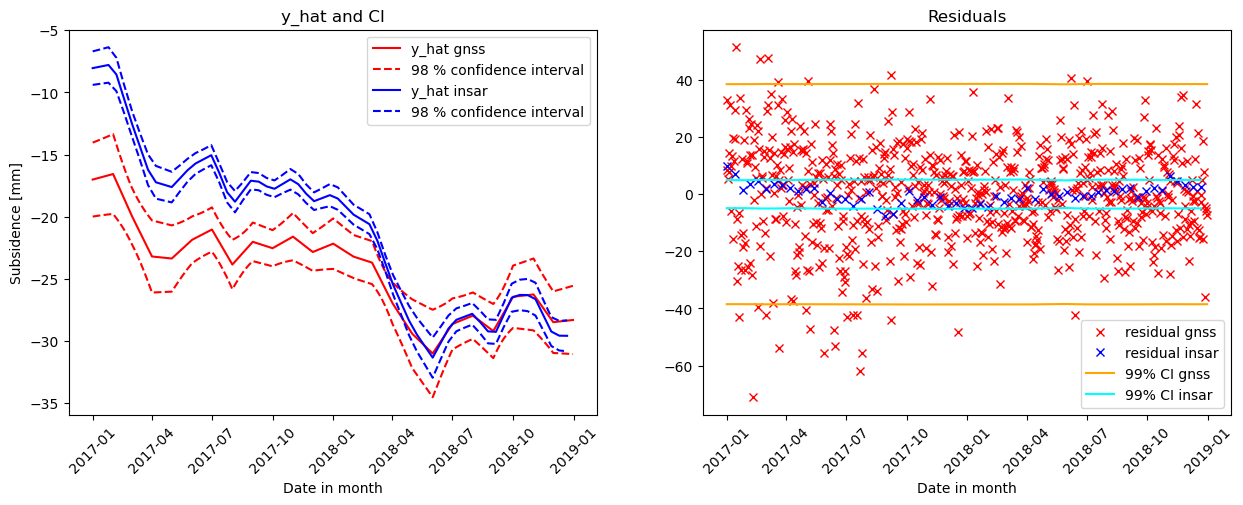

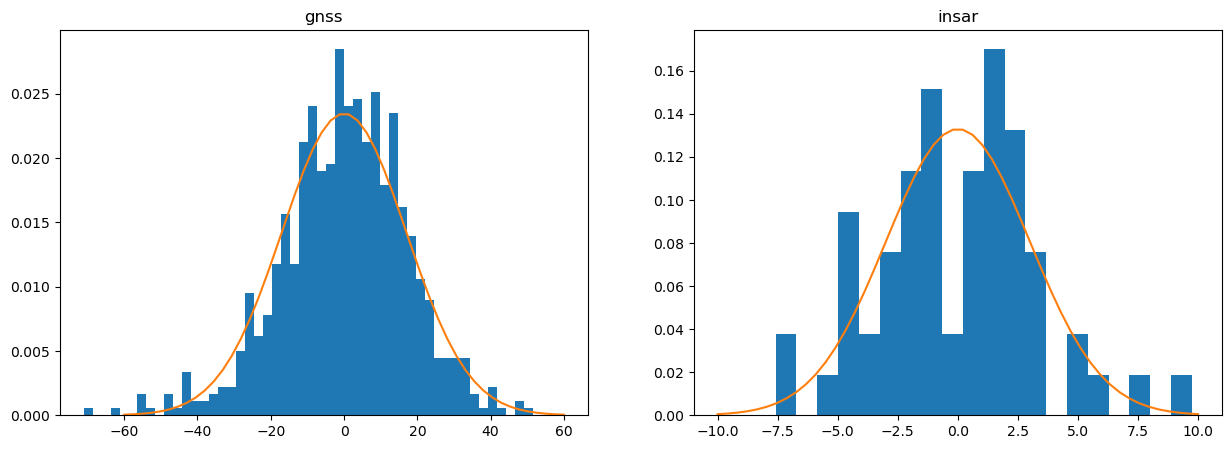

In [18]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(dates_gnss, y_hat_gnss, 'r', label='y_hat gnss')
plt.plot(dates_gnss, y_hat_gnss + CI_yhat_gnss, 'r--', label='98 % confidence interval')
plt.plot(dates_gnss, y_hat_gnss - CI_yhat_gnss, 'r--')

plt.plot(dates_insar, y_hat_insar, 'b', label='y_hat insar')
plt.plot(dates_insar, y_hat_insar + CI_yhat_insar, 'b--', label='98 % confidence interval')
plt.plot(dates_insar, y_hat_insar - CI_yhat_insar, 'b--')
plt.title('y_hat and CI')
plt.ylabel('Subsidence [mm]')
plt.xlabel('Date in month')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(122)
plt.plot(dates_gnss, e_hat_gnss_1, 'rx', label='residual gnss')
plt.plot(dates_insar, e_hat_insar_1, 'bx', label='residual insar')
plt.plot(dates_gnss, CI_e_gnss, color = 'orange', label='99% CI gnss')
plt.plot(dates_gnss, -1 * CI_e_gnss, color = 'orange')
plt.plot(dates_insar, CI_e_insar, color = 'aqua', label='99% CI insar')
plt.plot(dates_insar, -1 * CI_e_insar, color ='aqua')

plt.title('Residuals')
plt.xlabel('Date in month')
plt.xticks(rotation=45)
plt.legend()

print(f'Std of gnss residual: {np.std(e_hat_gnss_1)} mm')
print(f'Std of insar residual: {np.std(e_hat_gnss_1)} mm')

print(f'Mean of gnss residual: {np.mean(e_hat_gnss_1)} mm')
print(f'Mean of insar residual: {np.mean(e_hat_insar_1)} mm')

norm_pdf = norm(0, 17) #estimate from hist
x = np.linspace(-60, 60)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(e_hat_gnss_1, density=True, bins=50)
plt.plot(x, norm_pdf.pdf(x))
plt.title('gnss')

norm_pdf = norm(0, 3) #estimate from hist
x = np.linspace(-10, 10)
plt.subplot(122)
plt.hist(e_hat_insar_1, density=True, bins=20)
plt.plot(x, norm_pdf.pdf(x))
plt.title('insar');

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6.2: </b>   
    
Answer the following questions:
<ol>
    <li>When you plot the residuals vs time, do you see any systematic effect? Give your interpretation for any discrepancy between observations and the model?</li>
    <li>What is the mean value of the residuals?</li>
    <li>What is the standard deviation of the residuals?</li>
    <li>What can you conclude when you compare the histogram of the data with the computed normal distribution? </li>
    <li>Did you use quantitative results in your answers?!</li>
</ol>
</p>
</div>


**Write your answer in this Markdown cell.**

1. The residuals of the gnss model are much larger and vary much more than that of the insar model. There is little discrepancy between the insar model and observations, however for the gnss there is a larger discrepancy, this likely caused by the higher variance in the observations and lower variance in the model.

2. The mean of the residuals of the gnss is about 0 and for the insar model aswell. They are in order of e-14 and e-13.

3. The deviation has a strong difference, the gnss model has a deviation of 17 mm and the insar model of about 3 mm.

4. Due the large amount of observations and observation dates the gnss model is able to follow the normal distribution better. Due to the lower amount of observations in the insar model it is unable to follow the normal distribution as good.

5. Yes

## 7. Compare results between different datasets



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7: </b>   
    
Compare the results you found for the InSAR observations and the GNSS observations in the questions above. Discuss the differences between the results. Be quantitative!
    

</p>
</div>

**Write your answer in this Markdown cell.**

Initially the models were not very close to each other, but they roughly followed the same trajectory (as in were parallel to each other), this was caused by the difference in starting position of +9 and -4. This gap was closed due to the difference in velocity of -0.028 and -0.014, which led to the models moving closer to each other as time passed. At the end of the observed interval it can be seen that both models predict the same subsidence for a period. However, due to the larger (negative) velocity, it can be seen that the gnss model is starting to show a larger subsidence than the insar model. 

The difference in data can also be explained by the difference in measurement methods. GNSS is a system which works on time precision. If you want mm precision you need a receiving device with a very precise clock. Where GNSS uses radar which means that the sender receives the data back and can than interpret it. This is seen in the variance difference in the observations. Where GNSS has 307mm and insar has 52mm.

<div style="background-color:#ffa6a6; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"><p><b>Part 2:</b> from this cell and below, additional cells have been added to your notebook for you to complete the second part of Project 2.</p></div>

<div style="background-color:#ffa6a6; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"></p><b>Correction, Task 3:</b> the std dev, $\sigma_\textrm{GNSS}$, must be corrected to 15 mm (from original value of 5 mm). A corrected partial solution notebook has also been provided.
<br><br><b>&nbsp;&nbsp;&nbsp;&nbsp;>>> You need to change the value yourself!</b></div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Depending on how your code is written, it is highly likely you will over-write variable names from Part 1, so be careful if you re-run cells above.</p></div>

## 8. Set-up non-linear functional model

In the model we fitted so far, we only considered a linear velocity and a dependency on the grounwater level. However, when a heavy construction is built on 'soft' soil layers, compaction of the upper layers will be observed. This compaction is relatively large in the beginning but decreases when time passes. We can approach the behavior with a simplified model, assuming an exponential decay. 

*Please note that this is very simplified model that does not necessarily rely on physics.* 

The model is defined as
$$
d = d_0 + R \ (1-\exp\left(\frac{-t}{a}\right)) + k \ \textrm{GW},
$$
where $d$ is the displacement, $t$ is the time and $\textrm{GW}$ is the groundwater level. 

The model has 4 unknowns:
1. $d_0$, the initial displacement at $t_0$
2. $R$, which can be seen as the response of the soil layers to the extra weight of the road. When it would be zero, there would be no compaction due to the extra loading. 
3. $a$, a scaling parameter which represents the memory of the system
4. and $k$ the 'groundwater factor' which can be seen as the response of the layers due to changes in the groundwater level

It can be seen that the model is non-linear. We will therefore use non-linear least-squares to solve for the unknown parameters. 



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8.1: </b>   
    
Choose initial values for the model parameters. Use the code and Markdown cells below to justify your decision. We suggest two possible approaches: a) use the forward model and make a plot to see if you can get it in the right order of magnitude, or b) make an inference about what the values might be be using knowledge about each term in the model.
    
<i>Note: it may be useful at this point to define a function for your forward model to check the values. You will be able to re-use it in later Tasks as well.<i>
    
</p>
</div>

In [19]:
def forward_model(time, do_i, R_i, a_i, k_i, GW):
    """Compute the displacements based on our initial guess.
    """
    
    y_comp = do_i + R_i*(1-np.exp(-time/a_i))+k_i*GW
    
    return y_comp

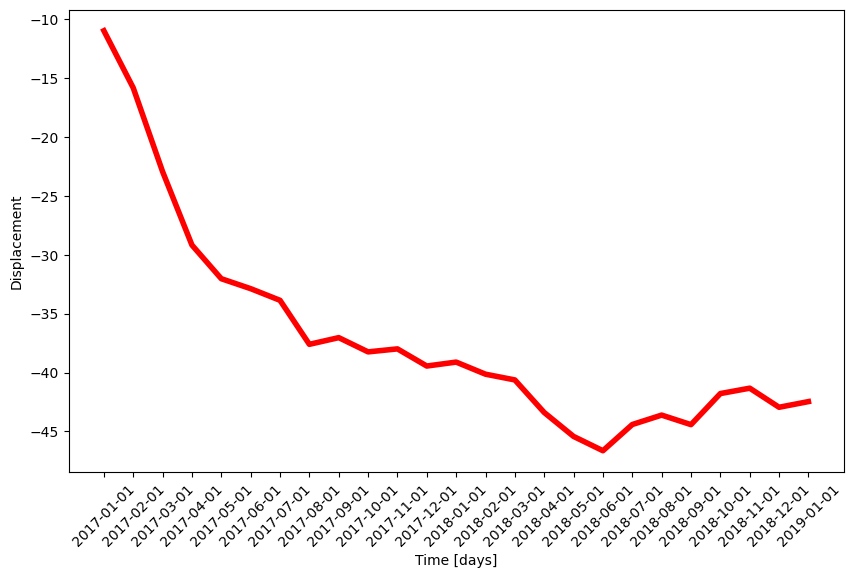

In [20]:
k_i = 0.1
R_i = -31
a_i = 5
do_i = 0

t = np.arange(0, len(gw))
d_t = forward_model(t, do_i, R_i, a_i, k_i, gw['observations[mm]'])

plt.figure(figsize=(10, 6))
plt.plot(gw['dates'], d_t,'r-', linewidth=4.0)
plt.xticks(rotation=45)
plt.xlabel('Time [days]')
plt.ylabel('Displacement');

**Write your answer in this Markdown cell.**

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8.2: </b>   
    
Set up the Jacobian matrix for the non-linear least-squares. Using the initial values from Task 8.1, print the first 5 rows of the Jacobian matrix to confirm that your function works (i.e., confirm code runs, and initial values give acceptable results).
    

</p>
</div>

In [21]:
def jacobian(time, do_i, R_i, a_i, k_i, GW):
    """Create the Jacobian matrix.
    
    The columns represent the linearized system of equations.
    """    
    
    J_c1 = np.array([1] * len(time))
    J_c2 = np.array(1- np.exp(-time/a_i))
    J_c3 = np.array((-R_i * np.exp(-time / a_i) * time) / a_i**2)
    J_c4 = np.array(GW)
    
    J = np.column_stack((J_c1, J_c2, J_c3, J_c4))
    
    return J

In [22]:
J_insar = jacobian(days_insar, do_i, R_i, a_i, k_i, GW_at_InSAR_times)

print ('The first 5 rows of the Jacobian matrix for InSAR are:')
print (J_insar[0:5,:])

n_2 = np.shape(J_insar)[1]
print(f'\nThe number of unknowns is {n_2}')
print(f'The redundancy (InSAR) is {m_insar - n_2}')
print(f'The redundancy (GNSS) is {m_gnss - n_2}')

The first 5 rows of the Jacobian matrix for InSAR are:
[[ 1.000e+00  0.000e+00  0.000e+00 -1.097e+02]
 [ 1.000e+00  9.093e-01  1.350e+00 -1.067e+02]
 [ 1.000e+00  9.918e-01  2.449e-01 -1.038e+02]
 [ 1.000e+00  9.993e-01  3.333e-02 -1.065e+02]
 [ 1.000e+00  9.999e-01  4.031e-03 -1.173e+02]]

The number of unknowns is 4
The redundancy (InSAR) is 57
The redundancy (GNSS) is 726


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8.3:</b>   
    
What is the redundancy of the model with InSAR and GNSS, respectively?
</p>
</div>

**Write your answer in this Markdown cell.**
The redundancy of insart is 57 and of gnss is 726

## 9. Set-up Gauss-Newton iteration algortim



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9: </b>   
    
Set up a Gauss-Newton iteration algorithm (complete the code below). Choose the criterion to stop the iteration. 
Explain below how and why you define the stop-criterium. 

</p>
</div>

In [23]:
def nlsq_iteration(x0, day, y_obs, Sigma_y, GW):
    """Use Gauss-Newton iteration to find non-linear parameters."""
    xnrm = 1000 # initialize stop criteria

    max_iter = 50
    xhat_i = np.zeros((max_iter, 4))
    xhat_i[0,:] = x0

    do_i = xhat_i[0,0]
    R_i = xhat_i[0,1]
    a_i = xhat_i[0,2]
    k_i = xhat_i[0,3]

    iter_ind = 0

    while xnrm >= 1e-12 and iter_ind < max_iter:

        # computed deformation yi based on 'estimates' 
        y_i = forward_model(day, do_i, R_i, a_i, k_i, GW)
        
        dy = y_obs - y_i

        J = jacobian(day, do_i, R_i, a_i, k_i, GW)



        d_xhat, Sigma_x_hat = BLUE(J, y_obs, Sigma_y)
        # Hint: re-use your function BLUE, above

        N = J.T @ np.linalg.inv(Sigma_y) @ J
        dxhat_i = np.linalg.inv(N) @ J.T @ np.linalg.inv(Sigma_y) @ dy

        xhat_i[iter_ind+1,:] = xhat_i[iter_ind,:] + dxhat_i.T

        do_i  = xhat_i[iter_ind+1,0]
        R_i  = xhat_i[iter_ind+1,1]
        a_i  = xhat_i[iter_ind+1,2]
        k_i = xhat_i[iter_ind+1,3]
        


        xnrm = dxhat_i.T @ N @ dxhat_i

        # Update the iteration number
        iter_ind += 1

        if iter_ind== max_iter:
            print("Number of iterations too large, check initial values.")
            #break

    xhat = xhat_i[iter_ind,:]
    xhat_i = xhat_i[0:iter_ind+1, :]
    return xhat, Sigma_x_hat, xhat_i, iter_ind, J


**Write your answer in this Markdown cell.**

## 10. Apply Gauss-Newton iteration



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 10.1: </b>   
    
Apply Gauss-Newton iteration on your model (run the code you completed above). 
    
For each unknown parameter, plot your estimates versus the iteration number (horizontal axis: iteration number, vertical axis: your estimate per iteration).

<i>For this Task, your output should include 8 plots at minimum (presenting additional values is also fine if it is relevant to your interpretation answers below).<i>
</p>
</div>

In [24]:
x0 = np.array([do_i, R_i, a_i,k_i])

[xhat_insar, Sigma_x_hat_insar, xhat_i_insar, niter_insar, J_final_insar] = \
    nlsq_iteration(x0, days_insar, y_insar, Sigma_y_insar, GW_at_InSAR_times)

[xhat_gnss, Sigma_x_hat_gnss, xhat_i_gnss, niter_gnss, J_final_gnss] = \
    nlsq_iteration(x0, days_gnss, y_gnss, Sigma_y_gnss, GW_at_GNSS_times)

print('\n InSAR Reults for each iteration (#Interations =', niter_insar, ')')
print(xhat_i_insar)

print('\n GNSS Reults for each iteration (#Interations =', niter_gnss, ')')
print(xhat_i_gnss)


 InSAR Reults for each iteration (#Interations = 8 )
[[ 0.000e+00 -3.100e+01  5.000e+00  1.000e-01]
 [ 1.371e+01 -2.128e+01  1.884e+01  1.105e-01]
 [ 4.884e+00 -2.034e+01  5.770e+01  5.712e-02]
 [ 1.123e+01 -1.950e+01  1.378e+02  1.296e-01]
 [ 1.307e+01 -2.426e+01  1.913e+02  1.241e-01]
 [ 1.312e+01 -2.485e+01  1.894e+02  1.227e-01]
 [ 1.312e+01 -2.485e+01  1.894e+02  1.227e-01]
 [ 1.312e+01 -2.485e+01  1.894e+02  1.227e-01]
 [ 1.312e+01 -2.485e+01  1.894e+02  1.227e-01]]

 GNSS Reults for each iteration (#Interations = 20 )
[[ 0.000e+00 -3.100e+01  5.000e+00  1.000e-01]
 [ 5.092e+00 -1.871e+01  1.124e+01  8.694e-02]
 [ 7.106e+00 -2.262e+01  1.927e+01  7.348e-02]
 [-3.576e-01 -1.724e+01  3.336e+01  5.984e-02]
 [-2.786e+00 -1.384e+01  6.553e+01  7.127e-02]
 [ 2.394e-03 -1.533e+01  8.864e+01  8.466e-02]
 [ 3.488e-02 -1.534e+01  9.279e+01  8.589e-02]
 [-9.432e-03 -1.526e+01  9.440e+01  8.636e-02]
 [-2.835e-02 -1.523e+01  9.507e+01  8.655e-02]
 [-3.639e-02 -1.521e+01  9.535e+01  8.664e-02

In [25]:
def plot_fit_iteration(xhat_i):
    """Plot value of each parameter, each iteration."""
    plt.figure(figsize = (15,4))
    plt.subplots_adjust(top = 2)

    plt.subplot(2,2,1)
    plt.plot(xhat_i[:,0], linewidth=4)
    plt.title(f'Convergence of k_i')
    plt.xlabel(f'Number of iterations')
    plt.ylabel(f'k_i')
    
    plt.subplot(2,2,2)
    plt.plot(xhat_i[:,1].T, linewidth=4)
    plt.title(f'Convergence of R_i')
    plt.xlabel(f'Number of iterations')
    plt.ylabel(f'R_i')
    
    plt.subplot(2,2,3)
    plt.plot(xhat_i[:,2].T, linewidth=4)
    plt.title(f'Convergence of a_i')
    plt.xlabel(f'Number of iterations')
    plt.ylabel(f'a_i')
    
    plt.subplot(2,2,4)
    plt.plot(xhat_i[:,3].T, linewidth=4)
    plt.title(f'Convergence of d_0')
    plt.xlabel(f'Number of iterations')
    plt.ylabel(f'd_0')



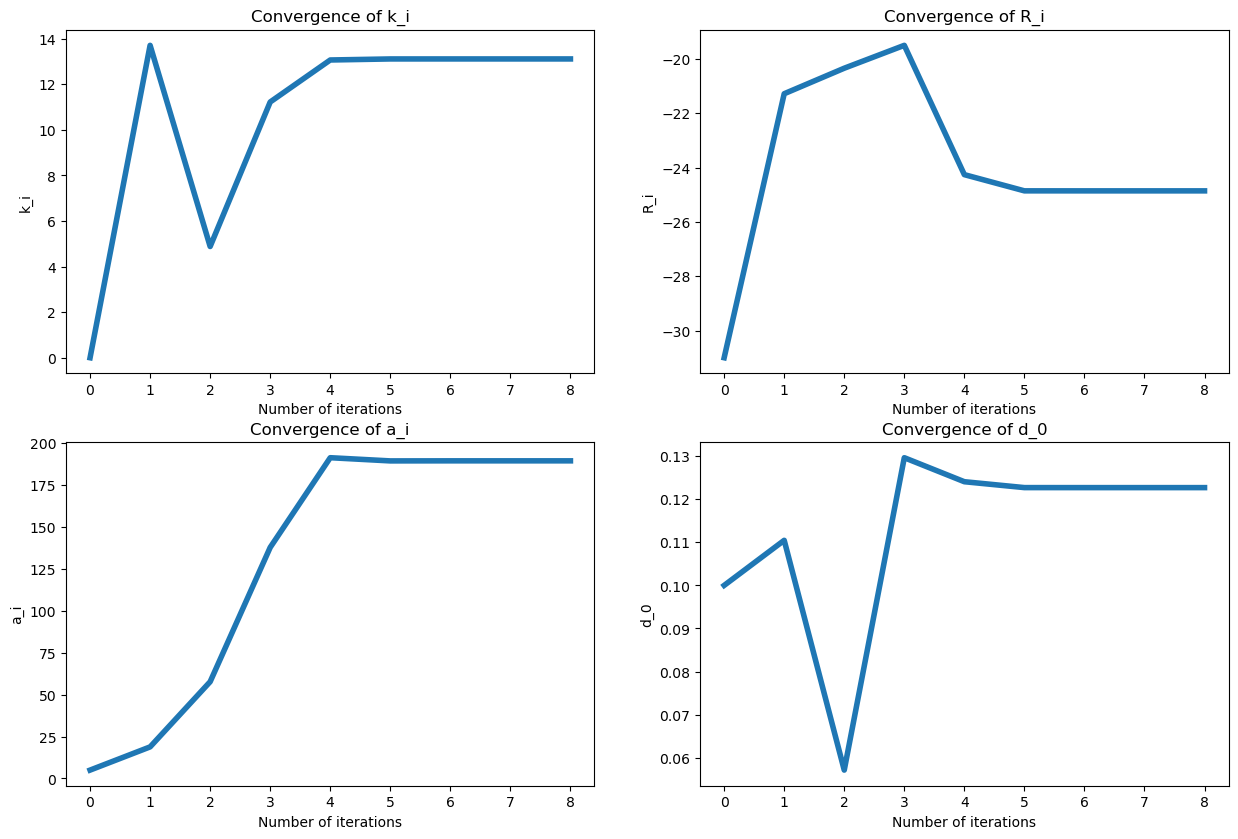

In [26]:
plot_fit_iteration(xhat_i_insar)

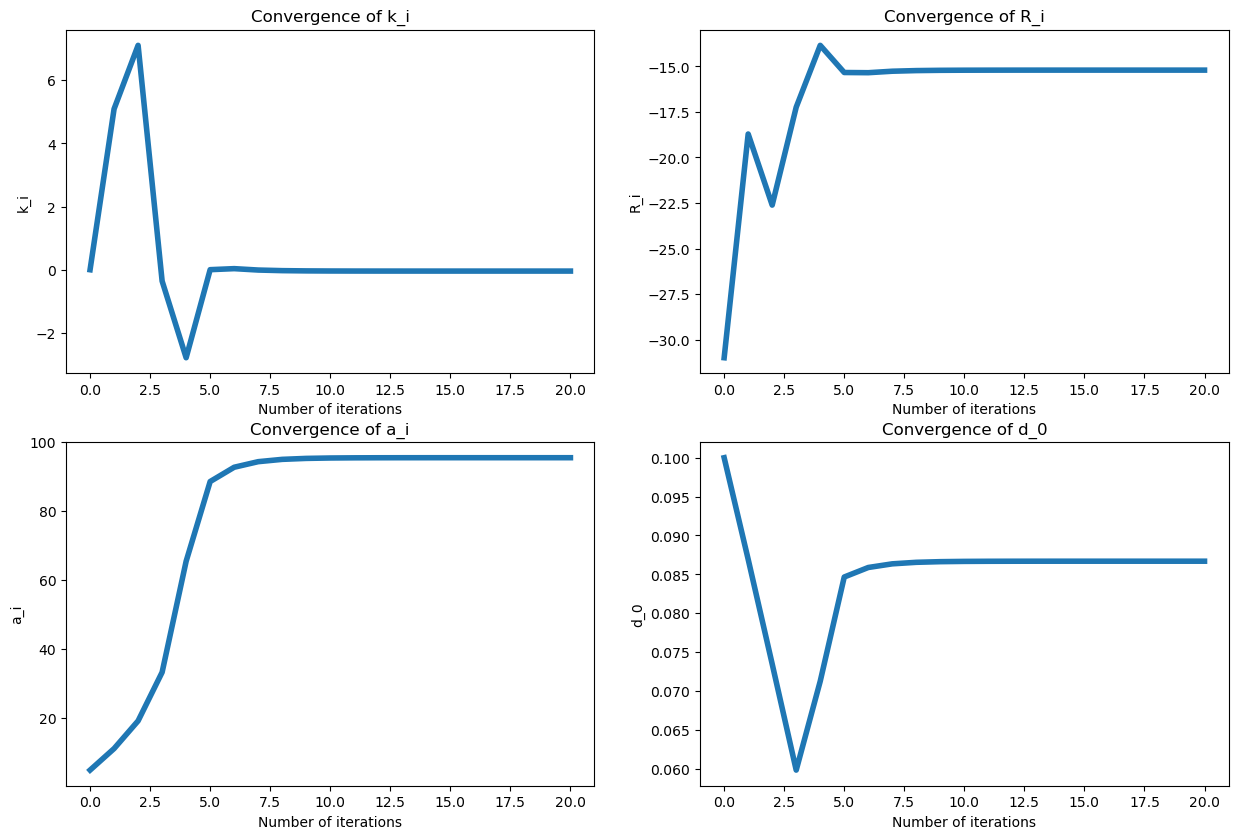

In [27]:
plot_fit_iteration(xhat_i_gnss)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 10.2: </b>   
    
- Does your iteration converge? If not, find out why and provide an explanation.

- After how many iterations does it converge? 
    
</p>
</div>

**Write your answer in this Markdown cell.**

Yes the iteration converges

insar converges after 8 iterations and GNSS converges after 20 iterations

## 11. Assess the precision of the estimates

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 11: </b>     
    
What is the quality of the final estimates? 
    
Provide the full covariance matrix of your estimates, and give an interpretation of the numbers in the covariance matrix.
    
</p>
</div>

In [28]:
def show_std(Qx_hat, data_type):
    print ('The standard deviation for',
           data_type + '-offset is',
           np.round(np.sqrt(Qx_hat[0,0]),2), 'mm')
    print ('The standard deviation for',
           data_type + '-R is',
           np.round(np.sqrt(Qx_hat[1,1]),2), 'mm')
    print ('The standard deviation for',
           data_type + '-a is',
           np.round(np.sqrt(Qx_hat[2,2]),2), 'days')
    print ('The standard deviation for',
           data_type + '-the ground water factor',
           np.round(np.sqrt(Qx_hat[3,3]),3), '[-]')

In [29]:
print ('Covariance matrix of estimated parameters (InSAR):')
print (Sigma_x_hat_insar, '\n')
show_std(Sigma_x_hat_insar, 'InSAR')
print ('\nCovariance matrix of estimated parameters (GNSS):')
print (Sigma_x_hat_gnss, '\n')
show_std(Sigma_x_hat_gnss, 'GNSS')

Covariance matrix of estimated parameters (InSAR):
[[ 4.765e+00 -5.220e-01 -7.257e+00  3.190e-02]
 [-5.220e-01  9.868e-01  3.329e+00  2.401e-03]
 [-7.257e+00  3.329e+00  4.054e+02  5.865e-02]
 [ 3.190e-02  2.401e-03  5.865e-02  2.764e-04]] 

The standard deviation for InSAR-offset is 2.18 mm
The standard deviation for InSAR-R is 0.99 mm
The standard deviation for InSAR-a is 20.14 days
The standard deviation for InSAR-the ground water factor 0.017 [-]

Covariance matrix of estimated parameters (GNSS):
[[ 2.411e+01 -5.706e+00 -3.590e+01  1.410e-01]
 [-5.706e+00  1.008e+01  6.659e+01  3.452e-02]
 [-3.590e+01  6.659e+01  1.230e+03  3.696e-01]
 [ 1.410e-01  3.452e-02  3.696e-01  1.392e-03]] 

The standard deviation for GNSS-offset is 4.91 mm
The standard deviation for GNSS-R is 3.18 mm
The standard deviation for GNSS-a is 35.06 days
The standard deviation for GNSS-the ground water factor 0.037 [-]


**Write your answer in this Markdown cell.**

Overall the standard deviations for the InSAR-offset and GNSS-offset value can be considered quite high due to the scale of the measurements which are in millimiters. 

The memory of the system based on the InSAR standard deviation is around 15 days less than the one measured by the GNSS. Also, the groundwater factor k is a bit more precise for the InSAR measurements than the k factor estimated from the GNSS measurements.

Based on the covariance matrix for the InSAR estimates one can deduce that the the initial displacement **d0** is negatively correlated with response of the soil layers to the extra weight of the road **R** and the memory of the system **a**. On the other hand it is positively correlated to the groundwater factor **k**. The same conclusions apply for the GNSS estimates.

The large variances (diagonal elements) for GNSS-a and GNSS-the ground water factor and for InSAR-a and InSAR- indicate significant uncertainty in estimating these parameters. The negative covariance between GNSS-offset and GNSS-a (-3.590e+01) suggests an inverse relationship: as GNSS-offset increases, GNSS-a tends to decrease, and vice versa. The positive covariance between GNSS-offset and GNSS-R (-5.706e+00) indicates a weak positive relationship between these parameters. The covariance between GNSS-offset and GNSS-the ground water factor (1.410e-01) is positive, suggesting a positive relationship between these parameters. The covariance between GNSS-R and GNSS-the ground water factor (3.452e-02) is also positive, indicating a positive relationship between these parameters.


The negative covariance between InSAR-offset and InSAR-a (-7.257e+00) suggests an inverse relationship. When InSAR-offset increases, InSAR-a tends to decrease, and vice versa. The positive covariance between InSAR-offset and InSAR-R (-5.220e-01) suggests a weak positive relationship between these parameters, but it is relatively small in magnitude. The covariance between InSAR-a and InSAR-R (3.329e+00) is positive, indicating that as InSAR-a increases, InSAR-R tends to increase, and vice versa. The covariance between InSAR-R and InSAR-the ground water factor (2.401e-03) is positive, suggesting a positive relationship between these parameters.

## 12. Present the estimation results



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 12.1:</b>   
    
Compute the modeled displacements ($\hat{\mathrm{y}}$), and corresponsing residuals ($\hat{\mathrm{\epsilon}}$). 
Visualize the results in two graphs and add the condidence bounds ($t$-versus-displacement and $t$-versus-residuals).

Also create a histogram of the residuals where you plot the normal distribution (which you can estimate from the histogram) as well and report the mean and sigma of the residuals. 
</p>
</div>

In [30]:

def plot_residual(dates, y, y_hat, name, J, Sigma_x_hat, Sigma_y, disp):
    Sigma_y_hat = J @ Sigma_x_hat @ J.T
    alpha = 0.02
    k98 = norm.ppf(1 - 0.5 * alpha)

    CI_yhat = k98 * np.sqrt(np.diagonal(Sigma_y_hat))
    k99 = norm.ppf(1 - 0.5 * 0.01)

    CI_e =  k99 * np.sqrt(np.diagonal(Sigma_y - Sigma_y_hat))

    epsilon_hat = y - y_hat


    plt.figure(figsize = (15,5))

    plt.subplot(121)
    plt.plot(dates, y, 'rx', label=f'obs of {name}')
    plt.plot(dates, y_hat, 'b', label=f'y_hat {name}')
    plt.plot(dates, y_hat + CI_yhat, 'b--', label='98 % confidence interval')
    plt.plot(dates, y_hat - CI_yhat, 'b--')
    plt.title('y_hat and CI')
    plt.ylabel('Subsidence [mm]')
    plt.xlabel('Date in month')
    plt.xticks(rotation=45)
    plt.legend()

    plt.subplot(122)
    plt.plot(dates, epsilon_hat, 'r', label=f'residual {name}')
    plt.plot(dates, CI_e, 'k', label='99% CI')
    plt.plot(dates, -1 * CI_e, 'k')

    plt.title('Residuals')
    plt.xlabel('Date in month')
    plt.xticks(rotation=45)
    plt.legend()

    print(f'Std of {name} residual: {np.std(epsilon_hat)} mm')

    print(f'Mean of {name} residual: {np.mean(epsilon_hat)} mm')

    norm_pdf = norm(0, np.std(epsilon_hat)) #estimate from hist
    x = np.linspace(-np.max(epsilon_hat), np.max(epsilon_hat))
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.hist(epsilon_hat, density=True, bins=50)
    plt.plot(x, norm_pdf.pdf(x))
    plt.title(f'{name}')

    return epsilon_hat


Std of InSAR residual: 1.7899267986392913 mm
Mean of InSAR residual: 5.0087438750302145e-15 mm


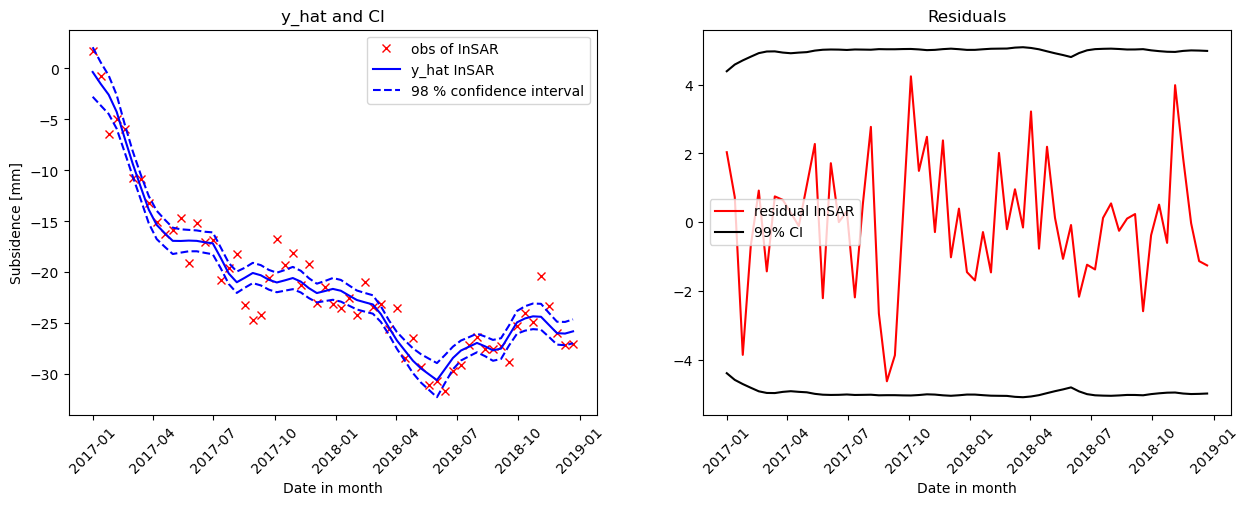

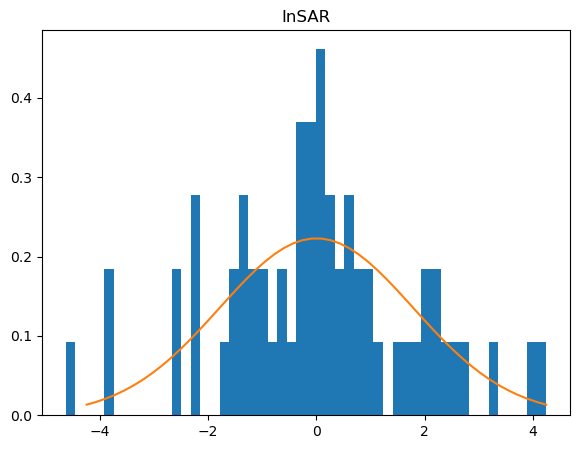

In [31]:
disp_insar = insar_obs

y_hat_insar_2 = forward_model(days_insar, xhat_insar[0], xhat_insar[1], xhat_insar[2],\
                             xhat_insar[3], GW_at_InSAR_times)
e_hat_insar_2 = plot_residual(dates_insar, y_insar, y_hat_insar_2,
                              'InSAR', J_final_insar, Sigma_x_hat_insar,

                              Sigma_y_insar, disp_insar)

Std of GNSS residual: 17.10684621589553 mm
Mean of GNSS residual: 2.6358215458059607e-14 mm


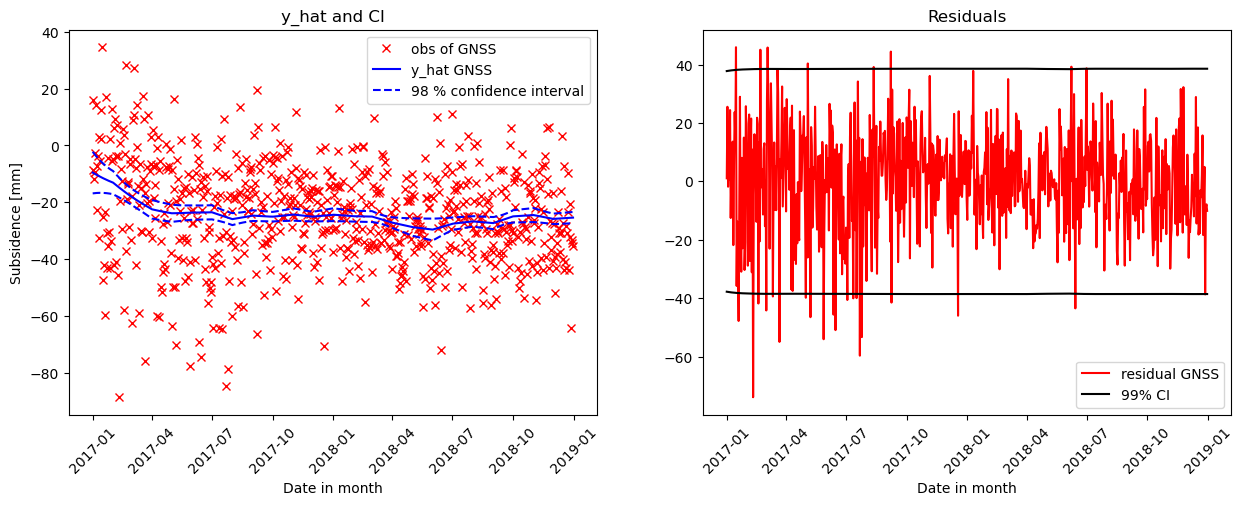

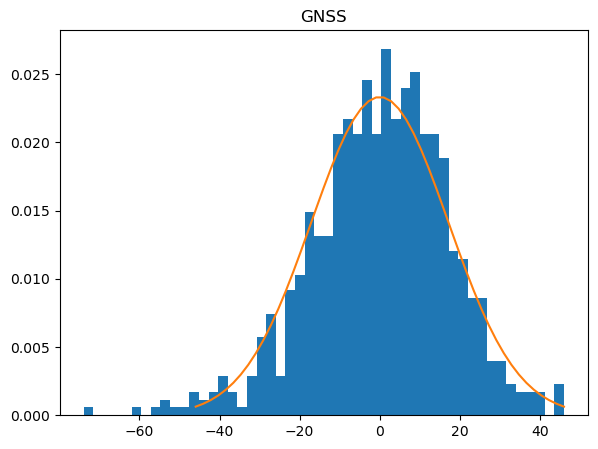

In [32]:
disp_gnss = gnss_obs

y_hat_gnss_2 = forward_model(days_gnss, xhat_gnss[0], xhat_gnss[1], xhat_gnss[2],\
                             xhat_gnss[3], GW_at_GNSS_times)
e_hat_gnss_2 = plot_residual(dates_gnss, y_gnss, y_hat_gnss_2,
                             'GNSS', J_final_gnss, Sigma_x_hat_gnss,
                             Sigma_y_gnss, disp_gnss)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 12.2:</b>   

Answer the following questions:
<ol>
    <li>Do you see any systematic effect?</li>
    <li>Give your interpretation for any discrepancy between observations and the model?</li>
    <li>What is the mean value of the residuals and what does this value tells you?</li>
    <li>And what is the empirical standard deviation of the residuals? Do you recognise this value?</li>
</ol>
</p>
</div>




**Write your answer in this Markdown cell.**

1. The insar model seems to have become more acurate, a order of magnitude 2 smaller standard devitation in the error and the mean error got halved. The gnss model has seen barely any difference in its risiduals.


2. The insar model is able to follow the observations fairly well and have a narrower confidence interval. On the other hand, because of the large amount and large variation in the observations of the gnss the model is around the mean of the gnns with smaller fluctiations not being as visible because they are averaged out by the large variance.


3. 1.8 mm for insar and 17 for gnss. It shows that the mean residual value for the insar got reduced by a big margin. It tells that the insar model is better able to follow the observations than the gnss model. 


4. The empirical std is about 3 for the insar model and 20 for the gnss model. It tells us that between the gnss model and the observations there is a large variance between the errors. This is to be expected because of the large variance in the observations itself due to the daily - more inaccurate - measurements. These standard deviations are expected values come close t othe given standard deviations of 5 and 15 in task 3.1


## 13. Strategies to improve?


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 13:</b>   

In order to get a better fit to the data (smaller residuals) for this case study, which of the following strategies could help? (elaborate on your answer)
<ol>
    <li>better observations?</li>
    <li>a more complicated geophysical model?</li>
    <li>better initial values?</li>
    <li>more observations?</li>
</ol>
</p>
</div>

**Write your answer in this Markdown cell.**
In  this case, a combination of better observations(1) and better initial values(3) can help promote the accuracy. 
The satellite data is of big scale in metre when in the model we use the scale of milimetres, which as a result can lead to huge deviation.
We used linear function model, stochastic model and non-linear functional model to see the difference between different models, where the more sophisticated non-linear model did not show higher accuracy. But it is also very important to compare the results between different models.
Also the more accurate initial of K in InSAR help the estimation of InSAR have better goodness of fit compared with the estimation of GNSS.
According to Task 11, more observations(i.e.GNSS) can lead to higher residuals.

## 14. Apply hypothesis test

In the assignment we used two different models:
* A linear model
* A model with linear and power components

Now we are going to test which model fits the data the best. We will do this with the Generalized Likelihood Ratio (GLR) test. For both the GNSS and InSAR observations





<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 14: </b>   

The critical value is computed with level of significance $\alpha=0.005$ the test statistics is computed in the code below.
    
Answer the following questions:
<ol>
    <li>What is the null hypothesis $H_0$ and alternative hypothesis $H_a$ in this test?</li>
    <li>How can you compute the test statistic? What is its distribution?</li>
</ol>
</p>
</div>


In [33]:
q = 1 #Degree of freedom
alpha = 0.005 

# Critical value
k = chi2.ppf(1 - alpha, df=q)
print(f'The critical value is {np.round(k, 3)}')

The critical value is 7.879


In [34]:
t1_insar = e_hat_insar_1.T @ np.linalg.inv(Sigma_y_insar) @ e_hat_insar_1
t2_insar = e_hat_insar_2.T @ np.linalg.inv(Sigma_y_insar) @ e_hat_insar_2
t_insar = t1_insar - t2_insar
print(f'The test statistic for InSAR data is {np.round(t_insar, 3)}')

The test statistic for InSAR data is 115.457


In [35]:
t1_gnss = e_hat_gnss_1.T @ np.linalg.inv(Sigma_y_gnss) @ e_hat_gnss_1
t2_gnss = e_hat_gnss_2.T @ np.linalg.inv(Sigma_y_gnss) @ e_hat_gnss_2
t_gnss = t1_gnss - t2_gnss
print(f'The test statistic for GNSS data is {np.round(t_gnss, 3)}')

The test statistic for GNSS data is 6.427


**Write your answer in this Markdown cell.**

1. The null hypothesis we assume to be that the the linear model makes better esitmates. The alternative hypothesis is that the non-linear(exponential) model estimates fit the data better. This means that if we reject the null hypothesis the non-linear model would represent the unknown parameters better. Accepting the null hypothesis means that the linear model provides a better fit to the data. 

2. The test statistic is computed by taking the difference of the sum of the squared residuals (= estimated errors) divided by the variance of the random errors between the linear model and the non-linear model. The distribution is a Chi-2 distribution.

## 15. Interpretation of test outcomes




<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 15: </b>   
    
Answer the following questions:
<ol>
    <li>What are the test statistic values for the two models (linear model and exponential model) for both the InSAR and the GNSS observations?</li>
    <li>What is to be concluded based on the individual test outcomes (i.e., for GNSS and InSAR)?</li>
    <li>Please compare the different test outcomes with InSAR and GNSS and discuss/explain them here.</li> 
</ol>
</p>
</div>


**Write your answer in this Markdown cell.**


**Question 1**
The test statistic for GNSS data is 6.427
The test statistic for InSAR data is 115.457


**Question 2**
If Test Statistic (GNSS) < Critical Value, then you would fail to reject the null hypothesis.
If Test Statistic (GNSS) ≥ Critical Value, then you would reject the null hypothesis.
In this case, since 6.427 < 7.879, we fail to reject the null hypothesis for GNSS data.

For InSAR Data:
Test Statistic (InSAR) = 115.457
Critical Value = 7.879

If Test Statistic (InSAR) < Critical Value, then you would fail to reject the null hypothesis.
If Test Statistic (InSAR) ≥ Critical Value, then you would reject the null hypothesis.
In this case, since 115.457 ≥ 7.879, we reject the null hypothesis for InSAR data.


**Question 3**
InSAR Data Outcome:

The test statistic for InSAR data (115.457) is significantly higher than the critical value (7.879).
This suggests strong evidence to reject the null hypothesis for InSAR data. In other words, the observed data for InSAR is inconsistent with what would be expected under the null hypothesis.

GNSS Data Outcome:

The test statistic for GNSS data (6.427) is less than the critical value (7.879).
This indicates that there isn't enough evidence to reject the null hypothesis for GNSS data. In other words, the observed data for GNSS is consistent with what would be expected under the null hypothesis.

The key difference in the outcomes is the strength of evidence against the null hypothesis. For InSAR data, there is strong evidence against the null hypothesis, while for GNSS data, there is not enough evidence to reject the null hypothesis. This suggests that there may be significant differences or effects in the InSAR data that are not present or not as pronounced in the GNSS data, based on the specific hypothesis tests and significance levels used.





## 16. How to deal with 2 datasets?

Data acquisition and processing comes with a price. Note that in a real situation you would not look at a time series of only one point. For Sentinel-1 data you may have to pay, collecting GNSS data at different locations also costs money. 


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 16: </b>   
    
Answer the following questions:
<ol>
    <li>How will you monitor the deformation if you have both GNSS and InSAR data at your disposal?</li>
    <li>Based on the results obtained here: what would you be your advice to Rijkswaterstaat in terms of data acquisition?</li>
</ol>
</p>
</div>


**Write your answer in this Markdown cell.**

1. The gnss data gives higher redundancy because of the amount of data, which leads to a higher precision in estimations. However, the due to the larger deviation this data has it makes it hard to fit a exponential model. Ideally a combination of the usage of the 2 datasets is best. 

2. For more accurate prediction of subsidence with respect to groundwater levels we would recommend the use of the GNSS model since this is able to use the exponential model that uses the groundwater level to fluctuate subsidence. In contrast, from task 14 it shows that for the gnss data the linear model is a better fit, however this would not give a satisfactory precision. 


<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p> <b>Disclaimer:</b> the outliers in the GNSS data were added manually, and do not necessarily represent reality, which means that you cannot conclude from this assignment that InSAR is better than GNSS. Without the outliers, GNSS would have given you different results and then the larger noise would be compensated by the higher sampling rate.</p></div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a500049d-30af-404c-96db-2f0c3dcbf769' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>